In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Load training and testing datasets
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
train

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,5,17,1,9085,1,1,138.0,1,37,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled


In [3]:
# Check if there are any missing values
train.isna().sum().sort_values(ascending=False)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
# First, let's see what columns are actually in the dataset
print("Current columns in the dataset:")
print(train.columns.tolist())
print(f"\nTotal columns: {len(train.columns)}")

# Define columns to remove (only if they exist)
columns_to_remove = [
    'Unemployment rate',
    'Inflation rate', 
    'GDP',
    'Marital status',
    'Application mode',
    'Daytime/evening attendance',
    "Mother's qualification",
    "Father's qualification",
    'Debtor',
    'Tuition fees up to date',
    'Displaced'
]

# Check which columns actually exist in the dataset
existing_columns_to_remove = [col for col in columns_to_remove if col in train.columns]
missing_columns = [col for col in columns_to_remove if col not in train.columns]

print(f"\nColumns to remove that exist: {existing_columns_to_remove}")
print(f"Columns that don't exist in dataset: {missing_columns}")

# Remove only the existing columns
if existing_columns_to_remove:
    train = train.drop(columns=existing_columns_to_remove)
    test = test.drop(columns=existing_columns_to_remove)
    print(f"\nSuccessfully removed {len(existing_columns_to_remove)} columns")
else:
    print("\nNo columns to remove found in dataset")

print(f"Final dataset shape - Training: {train.shape}, Test: {test.shape}")

Current columns in the dataset:
['Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Target']

Total columns: 29

Columns to remove that exist: ['Debtor', 'Tuition fees up to date', 'Displaced']
Columns that don't exist in dataset: ['Unemplo

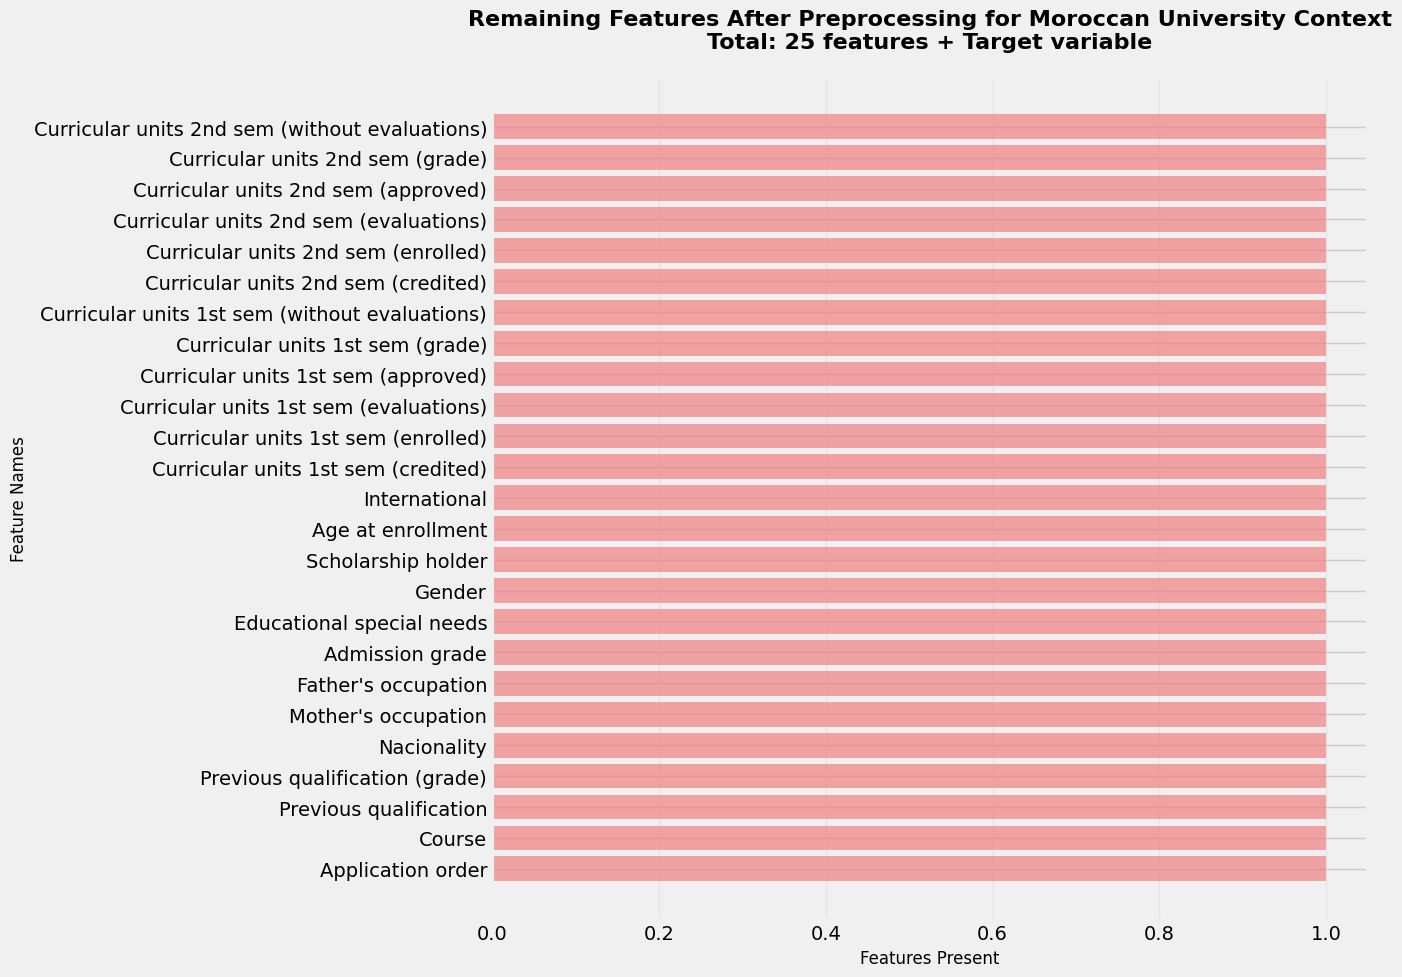

Total remaining features: 25 + Target variable
Dataset shape: Training (76518, 26), Test (51012, 25)

📊 Features by Category:
🎓 Demographics (4): Gender, Nacionality, International, Age at enrollment
📝 Academic Background (4): Application order, Course, Previous qualification, Previous qualification (grade), Admission grade
🏫 Support & Needs (2): Educational special needs, Scholarship holder
👨‍👩‍👧‍👦 Family Background (2): Mother's occupation, Father's occupation
📈 1st Semester Performance (6): credited, enrolled, evaluations, approved, grade, without evaluations
📉 2nd Semester Performance (6): credited, enrolled, evaluations, approved, grade, without evaluations
🎯 Target: Student outcome (Graduate/Dropout/Enrolled)


In [9]:
# Get the remaining columns (excluding Target for better visualization)
remaining_columns = [col for col in train.columns if col != 'Target']

# Create the plot
plt.figure(figsize=(14, 10))
plt.barh(remaining_columns, [1] * len(remaining_columns), color='lightcoral', alpha=0.7)
plt.title(f'Remaining Features After Preprocessing for Moroccan University Context\nTotal: {len(remaining_columns)} features + Target variable', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features Present', fontsize=12)
plt.ylabel('Feature Names', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print summary by category
print(f"Total remaining features: {len(remaining_columns)} + Target variable")
print(f"Dataset shape: Training {train.shape}, Test {test.shape}")
print("\n📊 Features by Category:")
print("🎓 Demographics (4): Gender, Nacionality, International, Age at enrollment")
print("📝 Academic Background (4): Application order, Course, Previous qualification, Previous qualification (grade), Admission grade")
print("🏫 Support & Needs (2): Educational special needs, Scholarship holder") 
print("👨‍👩‍👧‍👦 Family Background (2): Mother's occupation, Father's occupation")
print("📈 1st Semester Performance (6): credited, enrolled, evaluations, approved, grade, without evaluations")
print("📉 2nd Semester Performance (6): credited, enrolled, evaluations, approved, grade, without evaluations")
print("🎯 Target: Student outcome (Graduate/Dropout/Enrolled)")

=== TARGET VARIABLE ANALYSIS ===
Target distribution:
Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

Target proportions:
Target
Graduate    0.474
Dropout     0.331
Enrolled    0.195
Name: proportion, dtype: float64


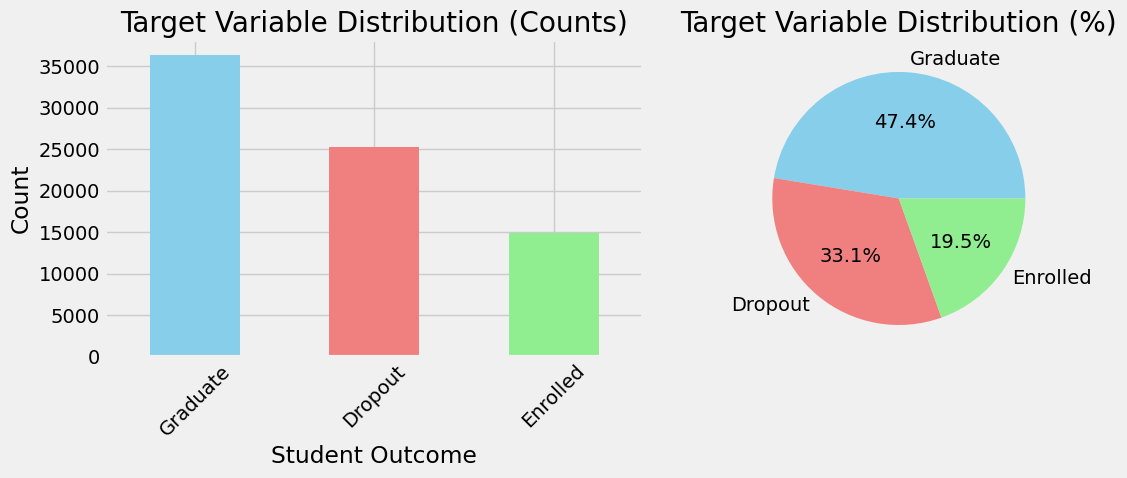

In [10]:
# 1. First, let's examine the target variable distribution
print("=== TARGET VARIABLE ANALYSIS ===")
print("Target distribution:")
print(train['Target'].value_counts())
print(f"\nTarget proportions:")
print(train['Target'].value_counts(normalize=True).round(3))

# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train['Target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Target Variable Distribution (Counts)')
plt.xlabel('Student Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
train['Target'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', 
                                                  colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Target Variable Distribution (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [11]:
# 2. Check for missing values
print("\n=== MISSING VALUES ANALYSIS ===")
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentages = (train.isnull().sum() / len(train) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentages
})

print("Missing values summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing values if any exist
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_data = missing_df[missing_df['Missing_Count'] > 0]
    plt.bar(missing_data.index, missing_data['Missing_Percentage'])
    plt.title('Missing Values by Feature (%)')
    plt.xticks(rotation=45)
    plt.ylabel('Missing Percentage')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found!")


=== MISSING VALUES ANALYSIS ===
Missing values summary:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found!


In [12]:
# 3. Identify and analyze outliers for numerical columns
print("\n=== OUTLIERS ANALYSIS ===")
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'Target']  # Remove target

print(f"Numerical columns to check for outliers: {len(numerical_cols)}")
print(numerical_cols)

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers for each numerical column
outlier_summary = []
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(train, col)
    outlier_summary.append({
        'Column': col,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': round(len(outliers)/len(train)*100, 2),
        'Lower_Bound': round(lower, 2),
        'Upper_Bound': round(upper, 2)
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\nOutliers summary:")
print(outlier_df.sort_values('Outlier_Percentage', ascending=False))


=== OUTLIERS ANALYSIS ===
Numerical columns to check for outliers: 25
['Application order', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's occupation", "Father's occupation", 'Admission grade', 'Educational special needs', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']

Outliers summary:
                                            Column  Outlier_Count  \
10                              Scholarship holder          18930   
23         

=== VISUALIZING KEY OUTLIERS ===


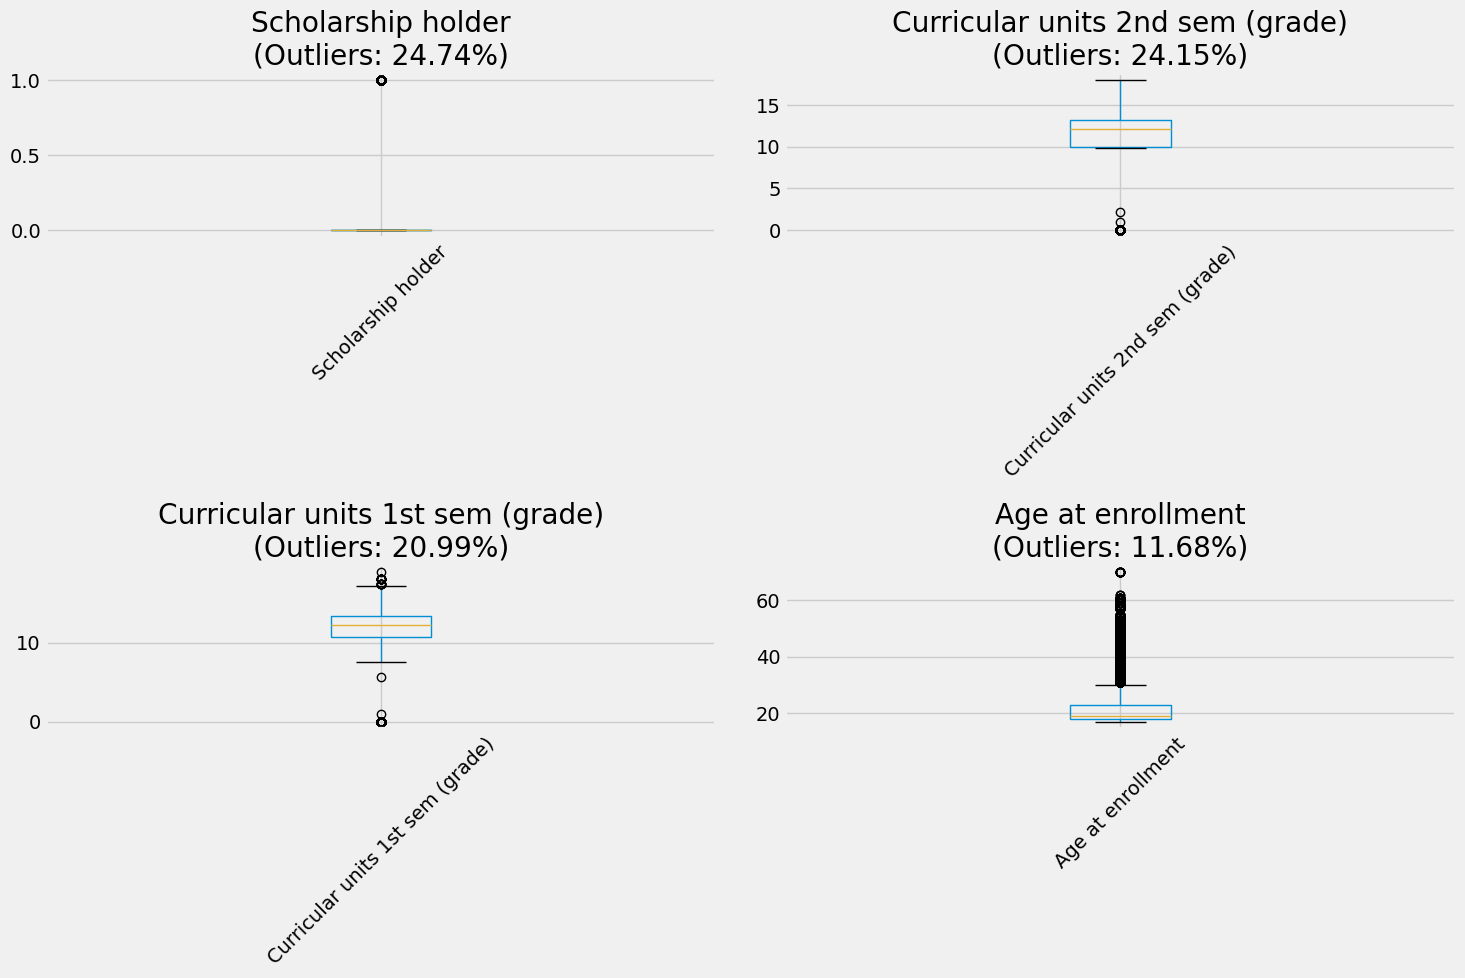


=== DATA TYPES ANALYSIS ===
Data types:
int64      21
float64     4
object      1
Name: count, dtype: int64

Categorical columns that might need encoding:


In [13]:
# 4. Visualize outliers for key features
print("=== VISUALIZING KEY OUTLIERS ===")

# Select top outlier features to visualize
top_outlier_features = ['Scholarship holder', 'Curricular units 2nd sem (grade)', 
                       'Curricular units 1st sem (grade)', 'Age at enrollment']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(top_outlier_features):
    # Box plot
    train.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col}\n(Outliers: {outlier_df[outlier_df["Column"]==col]["Outlier_Percentage"].values[0]}%)')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Check data types and categorical variables
print("\n=== DATA TYPES ANALYSIS ===")
print("Data types:")
print(train.dtypes.value_counts())

print("\nCategorical columns that might need encoding:")
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
if 'Target' in categorical_cols:
    categorical_cols.remove('Target')
    
for col in categorical_cols:
    print(f"{col}: {train[col].nunique()} unique values")
    print(f"  Sample values: {train[col].unique()[:5]}")
    print()